In [35]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from tensorflow import keras

import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder 

from joblib import dump, load

from sklearn import metrics


In [152]:
df = pd.read_csv("the_office_series.csv")
df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [153]:
del df['GuestStars'] # Mainly NaNs
del df['Date']
del df['About']
del df['EpisodeTitle']
del df['Writers']

df.rename(columns = {'Unnamed: 0':'Episode Number'}, inplace = True)

#del df['Unnamed: 0']

df.head()

,Episode Number,Season,Ratings,Votes,Viewership,Duration,Director
0,0,1,7.5,4936,11.2,23,Ken Kwapis
1,1,1,8.3,4801,6.0,23,Ken Kwapis
2,2,1,7.8,4024,5.8,22,Ken Whittingham
3,3,1,8.1,3915,5.4,23,Bryan Gordon
4,4,1,8.4,4294,5.0,23,Greg Daniels


Text(0.5, 1.0, 'IMDb Ratings for The Office episodes')

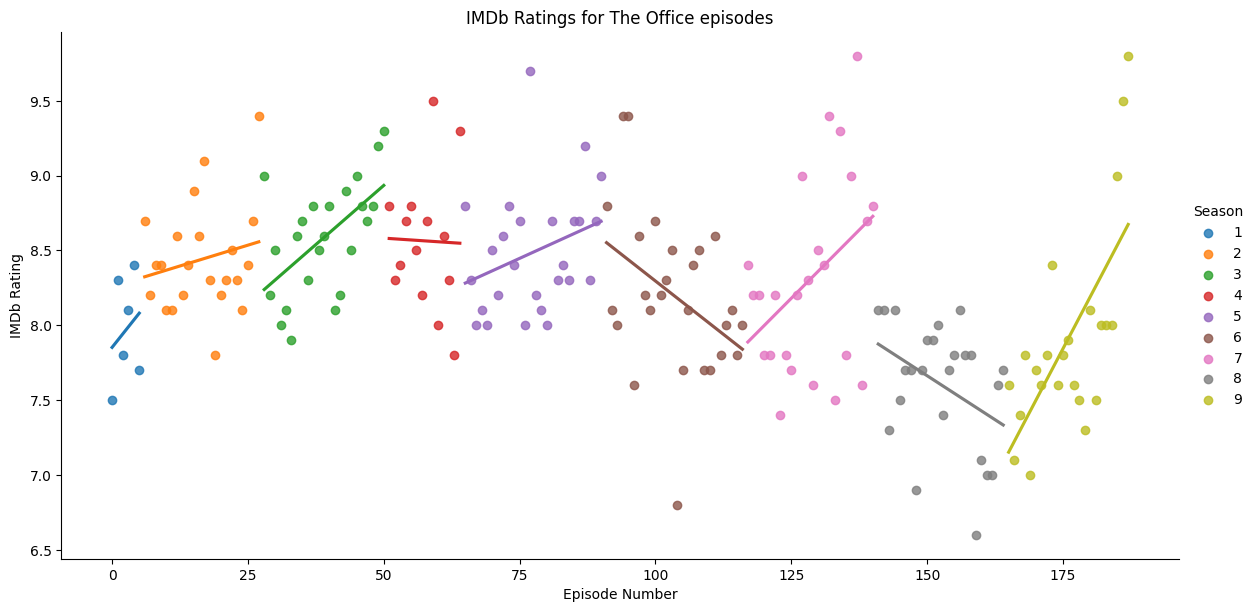

In [71]:
sns.lmplot(x="Episode Number", y="Ratings", hue="Season", data=df, height=6, aspect=2, ci=None)
plt.xlabel("Episode Number")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings for The Office episodes")

# w/o Director

In [17]:
del df['Episode Number']
del df['Director']

In [18]:
Predictors=['Season', 'Votes', 'Viewership', 'Duration']

X=df[Predictors]
y=df['Ratings']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler().fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [34]:
dump(ss, 'scaler1.bin', compress=True)

['scaler1.bin']

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

lr_pred = model_lr.predict(X_test)

#r_sq = model_lr.score(x, y)


lr_MSE = metrics.mean_squared_error(y_test, lr_pred)
lr_MAE = metrics.mean_absolute_error(y_test, lr_pred)
lr_MAPE = metrics.mean_absolute_percentage_error(y_test, lr_pred)


print('MSE',lr_MSE )

print('MAE', lr_MAE)

print('MAPE', lr_MAPE)


MSE 0.1729887207357422
MAE 0.3234909296076554
MAPE 0.040415493900662715


In [20]:
output_test = ss.inverse_transform(X_test)

outputs = pd.DataFrame(output_test, columns=Predictors)
outputs['Ratings'] = y_test.values
outputs['Linear Regression Ratings'] = lr_pred

outputs.head()

,Season,Votes,Viewership,Duration,Ratings,Linear Regression Ratings
0,9.0,1985.0,3.83,22.0,8.0,7.690852
1,8.0,1902.0,4.17,23.0,7.0,7.750498
2,2.0,3142.0,8.70,22.0,8.3,8.407311
3,2.0,3663.0,9.70,22.0,8.9,8.549461
4,5.0,2621.0,8.07,22.0,8.0,8.138586


<AxesSubplot: xlabel='Linear Regression Ratings', ylabel='Ratings'>

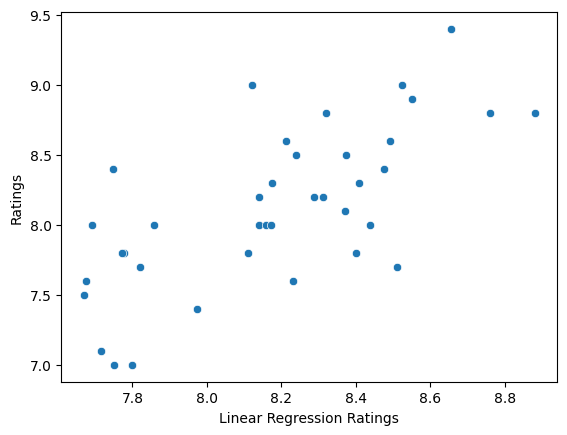

In [21]:
sns.scatterplot(data=outputs, x='Linear Regression Ratings', y='Ratings')

# Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train,y_train)

lasso_pred = lasso_model.predict(X_test)

#r_sq = model_lr.score(x, y)


lasso_MSE = metrics.mean_squared_error(y_test, lasso_pred)
lasso_MAE = metrics.mean_absolute_error(y_test, lasso_pred)
lasso_MAPE = metrics.mean_absolute_percentage_error(y_test, lasso_pred)


print('MSE',lasso_MSE )

print('MAE', lasso_MAE)

print('MAPE', lasso_MAPE)

MSE 0.19885584620544297
MAE 0.35479979135485207
MAPE 0.04467781866946372


In [79]:
scores = [[lr_MSE, lr_MAE, lr_MAPE], [lasso_MSE, lasso_MAE, lasso_MAPE]]
evaluation = pd.DataFrame(scores, columns=['MSE', 'MAE', 'MAPE'], index=['LinearRegression', 'LassoRegression'])

evaluation.head()

,MSE,MAE,MAPE
LinearRegression,0.172989,0.323491,0.040415
LassoRegression,0.198856,0.354800,0.044678


In [80]:
outputs['Lasso Regression Ratings'] = lasso_pred

outputs.head()

,Season,Votes,Viewership,Duration,Ratings,Linear Regression Ratings,Lasso Regression Ratings
0,9.0,1985.0,3.83,22.0,8.0,7.690852,7.943859
1,8.0,1902.0,4.17,23.0,7.0,7.750498,7.945982
2,2.0,3142.0,8.70,22.0,8.3,8.407311,8.328853
3,2.0,3663.0,9.70,22.0,8.9,8.549461,8.461563
4,5.0,2621.0,8.07,22.0,8.0,8.138586,8.196668


# Neural network

In [43]:
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1) 
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=500, batch_size=20)

Epoch 1/500
8/8 [==============================] - 1s 2ms/step - loss: 61.2425 - accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 43.4915 - accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 22.6827 - accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 20.9897 - accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 14.3753 - accuracy: 0.0000e+00
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 12.4999 - accuracy: 0.0000e+00
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 8.9006 - accuracy: 0.0000e+00
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 7.6205 - accuracy: 0.0000e+00
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 5.6280 - accuracy: 0.0000e+00
Epoch 10/500
8/8 [==============================] - 0s 4ms/step - loss: 3.5410 - accu

## Testing

In [6]:
X_test

array([[ 1.42419186, -1.0649505 , -1.68253966, -0.61478318],
       [ 1.0172799 , -1.18591617, -1.50859062, -0.42329333],
       [-1.42419186,  0.62128185,  0.80902463, -0.61478318],
       [-1.42419186,  1.3805965 ,  1.32063948, -0.61478318],
       [-0.20345598, -0.1380328 ,  0.48670728, -0.61478318],
       [ 0.20345598, -0.50384466,  0.96250909,  0.91713556],
       [-1.0172799 ,  0.95065826, -0.19374046,  0.91713556],
       [-0.20345598, -0.14677731,  0.82948923, -0.61478318],
       [-1.42419186,  1.19550445,  0.80902463, -0.61478318],
       [ 1.0172799 , -1.11887495, -0.49559322, -0.42329333],
       [-0.61036794,  0.06017601,  1.37691711,  0.91713556],
       [ 0.61036794, -0.6962238 ,  0.27182905, -0.42329333],
       [-1.0172799 ,  0.40704144,  0.88065071, -0.80627302],
       [ 1.0172799 , -1.05183374, -1.4011515 , -0.42329333],
       [-0.61036794,  0.59650575,  0.95227679, -0.61478318],
       [-0.20345598, -0.08993802,  0.95739294, -0.61478318],
       [ 0.20345598, -0.

In [7]:
X_test[0]

array([ 1.42419186, -1.0649505 , -1.68253966, -0.61478318])

In [52]:
sc = load('scaler1.bin')

In [53]:
testnp = np.array([[7, 5000, 6.0, 23]])
testnp = sc.transform(testnp)
testnp

c:\Users\tothb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.65261268,  1.87958021, -0.61319652, -0.62675337]])

In [42]:
lr_test = model_lr.predict(testnp)
print(lr_test)

[8.51809012]


In [68]:
testnp = np.array([[7, 5000, 12.0, 60]])
testnp = sc.transform(testnp)
test_pred = model.predict(testnp)
print(test_pred)

1/1 [==============================] - 0s 31ms/step
[[9.586867]]


c:\Users\tothb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Testing end

In [16]:
nn_pred = model.predict(X_test)


nn_MSE = metrics.mean_squared_error(y_test, nn_pred)
nn_MAE = metrics.mean_absolute_error(y_test, nn_pred)
nn_MAPE = metrics.mean_absolute_percentage_error(y_test, nn_pred)


print('MSE', nn_MSE )
print('MAE', nn_MAE)
print('MAPE', nn_MAPE)

2/2 [==============================] - 0s 3ms/step
MSE 0.23725173580700726
MAE 0.3676405078486394
MAPE 0.045642731264973584


In [57]:
evaluation.loc["NeuralNetwork"] = [nn_MSE, nn_MAE, nn_MAPE]
evaluation.head()

,MSE,MAE,MAPE
LinearRegression,0.176571,0.332272,0.041787
LassoRegression,0.175183,0.325397,0.041394
NeuralNetwork,0.291796,0.462732,0.057425


In [61]:
outputs['Neural Network Ratings'] = nn_pred

outputs.head()

,Season,Votes,Viewership,Duration,Ratings,Linear Regression Ratings,Lasso Regression Ratings,Neural Network Ratings
0,9.0,1985.0,3.83,22.0,8.0,7.651026,7.884566,7.641966
1,8.0,1902.0,4.17,23.0,7.0,7.706035,7.878830,7.641966
2,2.0,3142.0,8.70,22.0,8.3,8.526872,8.431666,8.428260
3,2.0,3663.0,9.70,22.0,8.9,8.744156,8.635675,8.799399
4,5.0,2621.0,8.07,22.0,8.0,8.189233,8.229187,8.741689


In [62]:
model.save('nn1.h5')

# w Director

In [104]:
df['Director'].unique()

array(['Ken Kwapis', 'Ken Whittingham', 'Bryan Gordon', 'Greg Daniels',
       'Amy Heckerling', 'Paul Feig', 'Charles McDougall',
       'Dennie Gordon', 'Victor Nelli Jr.', 'See full summary',
       'Roger Nygard', 'Randall Einhorn', 'Miguel Arteta', 'Tucker Gates',
       'Jeffrey Blitz', 'Harold Ramis', 'Julian Farino', 'Joss Whedon',
       'J.J. Abrams', 'Craig Zisk', 'Paul Lieberstein', 'Jason Reitman',
       'Jennifer Celotta', 'David Rogers', 'Stephen Merchant',
       'Dean Holland', 'Asaad Kelada', 'Gene Stupnitsky', 'Steve Carell',
       'Brent Forrester', 'Lee Eisenberg', 'Reginald Hudlin',
       'Seth Gordon', 'B.J. Novak', 'John Krasinski', 'Marc Webb',
       'Matt Sohn', 'Mindy Kaling', 'Rainn Wilson', 'John Scott',
       'Alex Hardcastle', 'Troy Miller', 'Charlie Grandy', 'Ed Helms',
       'Eric Appel', 'Brian Baumgartner', 'Claire Scanlon', 'Daniel Chun',
       'Bryan Cranston', 'Rodman Flender', 'Kelly Cantley-Kashima',
       'Lee Kirk', 'Jon Favreau', 'Jess

In [154]:
del df['Episode Number']

from sklearn.preprocessing import LabelEncoder 

director_encoder = LabelEncoder().fit(df.iloc[:, 5])
df.iloc[:, 5] = director_encoder.transform(df.iloc[:, 5])

df.head()

C:\Users\tothb\AppData\Local\Temp\ipykernel_17224\127018020.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 5] = director_encoder.transform(df.iloc[:, 5])


,Season,Ratings,Votes,Viewership,Duration,Director
0,1,7.5,4936,11.2,23,32
1,1,8.3,4801,6.0,23,32
2,1,7.8,4024,5.8,22,33
3,1,8.1,3915,5.4,23,7
4,1,8.4,4294,5.0,23,19


In [84]:
dump(director_encoder, 'labelEncoder1.bin', compress=True)

['labelEncoder1.bin']

In [155]:
Predictors=['Season', 'Votes', 'Viewership', 'Duration', 'Director']

X=df[Predictors]
y=df['Ratings']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler().fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [156]:
dump(ss, 'scaler_d.bin', compress=True)

['scaler_d.bin']

# Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

lr_pred = model_lr.predict(X_test)

lr_MSE = metrics.mean_squared_error(y_test, lr_pred)
lr_MAE = metrics.mean_absolute_error(y_test, lr_pred)
lr_MAPE = metrics.mean_absolute_percentage_error(y_test, lr_pred)

lr_accuracy = 100-(lr_MAPE*100)

print('MSE',lr_MSE )
print('MAE', lr_MAE)
print('MAPE', lr_MAPE)
print('Accuracy', lr_accuracy)

MSE 0.17281866369889115
MAE 0.3233912948943111
MAPE 0.040402849856484756
Accuracy 95.95971501435153


In [110]:
output_test = ss.inverse_transform(X_test)

outputs = pd.DataFrame(output_test, columns=Predictors)
outputs['Ratings'] = y_test.values
outputs['Linear Regression Ratings'] = lr_pred

outputs.head()

,Season,Votes,Viewership,Duration,Director,Ratings,Linear Regression Ratings
0,9.0,1985.0,3.83,22.0,37.0,8.0,7.691594
1,8.0,1902.0,4.17,23.0,13.0,7.0,7.749869
2,2.0,3142.0,8.70,22.0,15.0,8.3,8.406418
3,2.0,3663.0,9.70,22.0,8.0,8.9,8.548228
4,5.0,2621.0,8.07,22.0,19.0,8.0,8.138098


<AxesSubplot: xlabel='Linear Regression Ratings', ylabel='Ratings'>

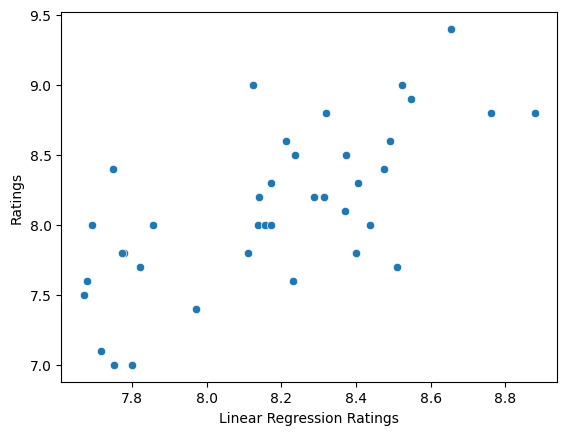

In [111]:
sns.scatterplot(data=outputs, x='Linear Regression Ratings', y='Ratings')

# Lasso Regression

In [112]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train,y_train)

lasso_pred = lasso_model.predict(X_test)

#r_sq = model_lr.score(x, y)


lasso_MSE = metrics.mean_squared_error(y_test, lasso_pred)
lasso_MAE = metrics.mean_absolute_error(y_test, lasso_pred)
lasso_MAPE = metrics.mean_absolute_percentage_error(y_test, lasso_pred)

lasso_accuracy = 100-(lasso_MAPE*100)

print('MSE',lasso_MSE )
print('MAE', lasso_MAE)
print('MAPE', lasso_MAPE)
print('Accuracy', lasso_accuracy)

MSE 0.19885584620544297
MAE 0.35479979135485207
MAPE 0.04467781866946372
Accuracy 95.53221813305363


In [113]:
scores = [[lr_MSE, lr_MAE, lr_MAPE, lr_accuracy], [lasso_MSE, lasso_MAE, lasso_MAPE, lasso_accuracy]]
evaluation = pd.DataFrame(scores, columns=['MSE', 'MAE', 'MAPE', 'Accuracy'], index=['LinearRegression', 'LassoRegression'])

evaluation.head()

,MSE,MAE,MAPE,Accuracy
LinearRegression,0.172819,0.323391,0.040403,95.959715
LassoRegression,0.198856,0.354800,0.044678,95.532218


In [114]:
outputs['Lasso Regression Ratings'] = lasso_pred

outputs.head()

,Season,Votes,Viewership,Duration,Director,Ratings,Linear Regression Ratings,Lasso Regression Ratings
0,9.0,1985.0,3.83,22.0,37.0,8.0,7.691594,7.943859
1,8.0,1902.0,4.17,23.0,13.0,7.0,7.749869,7.945982
2,2.0,3142.0,8.70,22.0,15.0,8.3,8.406418,8.328853
3,2.0,3663.0,9.70,22.0,8.0,8.9,8.548228,8.461563
4,5.0,2621.0,8.07,22.0,19.0,8.0,8.138098,8.196668


# Neural Network

In [115]:
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1) 
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=500, batch_size=20)

Epoch 1/500
8/8 [==============================] - 1s 2ms/step - loss: 62.5679 - accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 45.7972 - accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 25.6901 - accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 24.4866 - accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 17.8193 - accuracy: 0.0000e+00
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 11.8116 - accuracy: 0.0000e+00
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 9.2947 - accuracy: 0.0000e+00
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 7.4954 - accuracy: 0.0000e+00
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 6.8826 - accuracy: 0.0000e+00
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 5.2045 - accu

In [116]:
nn_pred = model.predict(X_test)


nn_MSE = metrics.mean_squared_error(y_test, nn_pred)
nn_MAE = metrics.mean_absolute_error(y_test, nn_pred)
nn_MAPE = metrics.mean_absolute_percentage_error(y_test, nn_pred)
nn_accuracy = 100-(nn_MAPE*100)

print('MSE', nn_MSE )
print('MAE', nn_MAE)
print('MAPE', nn_MAPE)
print('Accuracy', nn_accuracy)

2/2 [==============================] - 0s 4ms/step
MSE 0.16014509095862606
MAE 0.31248310741625346
MAPE 0.038668585236307056
Accuracy 96.13314147636929


In [117]:
evaluation.loc["NeuralNetwork"] = [nn_MSE, nn_MAE, nn_MAPE, nn_accuracy]
evaluation.head()

,MSE,MAE,MAPE,Accuracy
LinearRegression,0.172819,0.323391,0.040403,95.959715
LassoRegression,0.198856,0.354800,0.044678,95.532218
NeuralNetwork,0.160145,0.312483,0.038669,96.133141


In [118]:
outputs['Neural Network Ratings'] = nn_pred

outputs.head()

,Season,Votes,Viewership,Duration,Director,Ratings,Linear Regression Ratings,Lasso Regression Ratings,Neural Network Ratings
0,9.0,1985.0,3.83,22.0,37.0,8.0,7.691594,7.943859,7.332724
1,8.0,1902.0,4.17,23.0,13.0,7.0,7.749869,7.945982,7.184087
2,2.0,3142.0,8.70,22.0,15.0,8.3,8.406418,8.328853,8.405190
3,2.0,3663.0,9.70,22.0,8.0,8.9,8.548228,8.461563,8.484983
4,5.0,2621.0,8.07,22.0,19.0,8.0,8.138098,8.196668,8.215856


In [96]:
model.save('nn1_d.h5')

# Testing

In [168]:
ss = load('scaler_d.bin')
le = load('labelEncoder1.bin')

Season = 7
Votes = 6000
Viewership = 2
Duration = 60
Director = 'Paul Feig'


In [169]:
Director_a = np.array([Director])
Director_a

array(['Paul Feig'], dtype='<U9')

In [170]:
Director_a = le.transform(Director_a)

In [171]:
Director = Director_a[0]

In [172]:
Director

40

In [173]:
input_data = [[Season, Votes, Viewership, Duration, Director]]

In [174]:
X_test[0,:], input_data

(array([ 1.50016162, -0.78003667, -1.65384024, -0.76541562,  0.52296229]),
 [[7, 6000, 2, 60, 40]])

In [175]:
input_data = ss.transform(input_data)

c:\Users\tothb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [176]:
test_pred_nn = model.predict(input_data)

1/1 [==============================] - 0s 90ms/step


In [177]:
test_pred_nn

array([[9.031946]], dtype=float32)

# Testing 2

In [189]:
ss = load('scaler_d.bin')
le = load('labelEncoder1.bin')

Season = 7
Votes = 6000
Viewership = 2
Duration = 60
Director = 'Paul Feig'

input_data = [[Season, Votes, Viewership, Duration, Director]]

In [185]:
input_data[0][4]

'Paul Feig'

In [187]:
input_Director_a = np.array([input_data[0][4]])
input_Director_a = le.transform(input_Director_a)

In [188]:
input_Director_a

array([40])

In [190]:
input_Director_a = np.array([input_data[0][4]])
input_Director_a = le.transform(input_Director_a)
input_data[0][4] = input_Director_a[0]


In [191]:
input_data

[[7, 6000, 2, 60, 40]]